# Installs



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/MyDrive/Github/DeepLearning_final

/content/drive/MyDrive/Github/DeepLearning_final


In [21]:
!git pull

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), 295 bytes | 1024 bytes/s, done.
From https://github.com/Jeremylin0904/DeepLearning_final
   3dabe4f..d8191de  sebas      -> origin/sebas
Updating 3dabe4f..d8191de
Fast-forward
 LabelPropagation.py | 4 ++--
 1 file changed, 2 insertions(+), 2 deletions(-)


In [3]:
!pip install timm
!pip install av
!pip install joblib

In [4]:
import re
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from urllib import request
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.io import read_video
from torchvision.transforms import v2
import torch
from torch.utils.data import DataLoader, Dataset

import torch.nn.functional as F
from functools import partial
import gc
import av
import joblib

from timm.models.vision_transformer import PatchEmbed

from DataLoading import *
from SiamMae import *
from LabelPropagation import *
from train import *
from utils import *

# Data loading

In [5]:
# Change it in your branch !
root_path = '...'

In [8]:
transforms = v2.Compose([
    v2.Resize(size=(224,224), antialias=True),
    v2.Lambda(lambd=lambda x: x/255.0)
])

train_data = UCF101FullVideo(root=root_path, output_format="TCHW",transform=transforms)
train_data.__len__()
train_loader = DataLoader(train_data, 32, shuffle=True, collate_fn=custom_collate, pin_memory=True, num_workers = 2)

# Model training

In [ ]:
# Model, optimizer setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sim_mae_vit_small_path16 = sim_mae_vit_tiny_patch16_dec512d8b
model = sim_mae_vit_small_path16().to(device)
# Change in your branch
folder_logs = '/content/drive/MyDrive/DL Project/Trainings/logs.txt'
folder_model = '/content/drive/MyDrive/DL Project/Trainings'

num_epochs = 100
model = train(model, train_loader, folder_logs, folder_model, num_epochs=num_epochs, lr=1e-4)

/usr/local/lib/python3.10/dist-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")
/usr/local/lib/python3.10/dist-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


Epoch: 0/100, Batch: 0/374, Loss: 1.0291606187820435
Epoch: 0/100, Batch: 1/374, Loss: 0.66379714012146
Epoch: 0/100, Batch: 2/374, Loss: 0.5222420692443848
Epoch: 0/100, Batch: 3/374, Loss: 0.4461827278137207
Epoch: 0/100, Batch: 4/374, Loss: 0.372102290391922
Epoch: 0/100, Batch: 5/374, Loss: 0.31627795100212097
Epoch: 0/100, Batch: 6/374, Loss: 0.28252774477005005
Epoch: 0/100, Batch: 7/374, Loss: 0.26218611001968384
Epoch: 0/100, Batch: 8/374, Loss: 0.2346665859222412
Epoch: 0/100, Batch: 9/374, Loss: 0.19545255601406097
Epoch: 0/100, Batch: 10/374, Loss: 0.1896517276763916
Epoch: 0/100, Batch: 11/374, Loss: 0.16628047823905945
Epoch: 0/100, Batch: 12/374, Loss: 0.16365906596183777
Epoch: 0/100, Batch: 13/374, Loss: 0.1389472633600235
Epoch: 0/100, Batch: 14/374, Loss: 0.13895398378372192
Epoch: 0/100, Batch: 15/374, Loss: 0.11890748143196106
Epoch: 0/100, Batch: 16/374, Loss: 0.1112685576081276
Epoch: 0/100, Batch: 17/374, Loss: 0.12586736679077148


# Label propagation

In [5]:
# Change in your branch
root = '...'

videos_path = os.path.join(root, 'JPEGImages/480p')
labels_path = os.path.join(root, 'Annotations/480p')

## Model loading

In [6]:
model_path = '...'
model = sim_mae_vit_tiny_patch16_dec512d8b()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

## Inference

In [7]:
name_video = 'lady-running'
eval_davis(model, name_video, videos_path, labels_path, m=20, tau=0.1, k=7, nneib=7, model_name="3epochsiam")

100%|██████████| 64/64 [00:25<00:00,  2.49it/s]


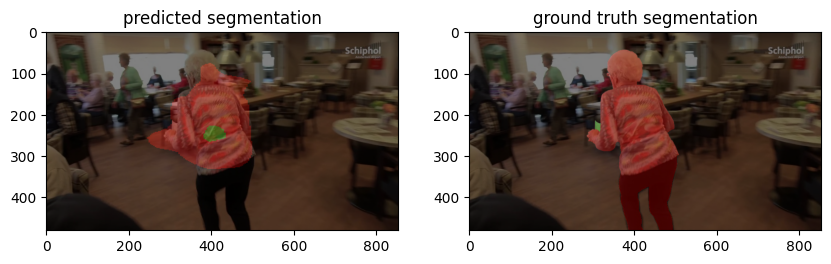

In [12]:
video_num = '00020'
name_video = 'lady-running'
show_segm(videos_path, labels_path, name_video, video_num, model_name="3epochsiam")

## Evaluation

In [14]:
video_num = '00061'
name_video = 'lady-running'
print(score_one_vid(videos_path, labels_path, name_video, model_name="3epochsiam"))

100%|██████████| 63/63 [00:37<00:00,  1.68it/s]

[0.40477281 0.48063723]
